In [24]:
from ko_crawler import *
from ko_text import *
import ast

import pickle

In [25]:
nlp = NLP()

In [26]:
token_df = pd.read_csv('Data/meta_0~200.csv',
                       usecols = ['Text','Section'],
                       dtype = {'Section' : 'category'},
                       #converters = {'Token' : ast.literal_eval},
                     )


In [27]:
token_df.head()

,Section,Text
0,financial,\n\n\n텀블벅에서 크라우드 펀딩이 이뤄지고 있는 `아침달 시집`.\n\n ...
1,economy,\n\n\n[사진 제공: 연합뉴스]\n\n 유류...
2,financial,부득이한 사정으로 매월 내는 보험료가 부담이 될 때 계약은 그대로 유지하면서 보험...
3,estate,한때 `미분양의 늪`으로 통하던 경기도 파주시 부동산 시장이 달라지고 있다. 지난해...
4,economy,\n\n\n인디고뱅크의 `미키인서울` 컬래버 맨투맨 <사진제공=월트디즈니코리아>\...


# 텍스트 클렌징을 위한 정규표현식 or 구문 추가

In [28]:
regex_ls = ['여기를 누르시면 크게 보실 수 있습니다',
            '무단 전재 및 재배포금지',
            'Copyrights']

In [29]:
nlp.add_regex(regex_ls)

# 불용어(stopwords) 사전 추가

In [30]:
stopword_ls = ['googletagdisplay',
               'windowjQuery',
               'documentwrite',
               'Copyrights'
               '기자',
               '연합뉴스',
               ]

In [31]:
nlp.add_stopwords(stopword_ls)

# Cleaning + Tokenizing

In [32]:
k = 11
token_df['Text'][k]

'최근 5년간 1천430건으로 이전 5년보다 71% ↑\n\'먹방\' 전성시대를 맞아 식품·외식산업 규모가 점점 커지고 식품 관련 디자인 출원도 늘고 있다.\n2일 특허청에 따르면, 식품 관련 디자인 출원은 2013년 이후 지난해까지 5년간 모두 1천430건으로 이전 5년(2008∼2012년)의 836건보다 71% 증가했다.\n일상에서 작지만 나를 위한 소소한 행복을 추구하는 문화가 확산하면서 \'소확행\'의 의미에 가장 잘 부합하는 디저트 시장의 성장이 괄목할 만하다. \n아이스크림, 빵, 떡과 같은 다양한 간식거리의 달콤한 맛으로 지친 일상에서 작은 행복을 찾는 것이다.googletag.display("google_dfp_MC_2x1,fluid");     아이스크림 디자인 출원은 최근 5년간 136건으로 이전 5년간 15건보다 9배가 폭발적으로 늘었다.\n막대에 꽂는 바형, 콘형 아이스크림 등 단순한 형태에서 과자와 함께 먹는 빵  형, 케이크 형 아이스크림 등으로 다양해졌다.\n대표적인 간식거리인 빵의 디자인 출원은 최근 5년간 295건으로 이전 5년의 181건보다 63%가 증가했다.googletag.display("google_dfp_MC_250x250"); \n최근에는 건강까지 생각해 유기농 밀을 사용하거나 화학첨가물을 사용하지 않는 천연발효 빵 등이 인기이고, 유명 캐릭터 모양의 빵, 다양화된 수제 초코파이 등도 시장에서 좋은 반응을 얻고 있다.\n전통식품의 디저트에 해당하는 떡 디자인도 이전 5년(58건)에 비해 1.3배가  증가한 74건이 출원되는 등 꾸준히 늘어나는 추세다.\n전통식품은 이미 다양한 형태의 디자인이 공지돼 상대적으로 등록 사례가  적지만, 전통 먹거리에 대한 관심이 커지면서 다양한 모양과 색상을 표현한 떡의 출원이 늘었기 때문으로 보인다.\n서홍석 특허청 디자인심사과장은 "웰빙에 대한 관심과 맞벌이 가구 증가,  소득수준 향상으로 식품·외식산업 규모는 점점 커진다"며 "소비자 입맛을 자극하는  다양한 식품 디자인 출원도 활발해

## morphs

In [33]:
%%time
' '.join(nlp.extract_morphs_for_all_document_FAST_VERSION(token_df['Text'].iloc[:30])[k])

CPU times: user 1.54 s, sys: 28.2 ms, total: 1.57 s
Wall time: 385 ms


'이전 먹방 시대 맞아 식품 외식산업 규모 점점 커지고 식품 디자인 출원 특허청 따르면 식품 디자인 출원 이후 모두 이전 증가 일상 지만 나를 소소한 행복 추구 문화 확산 확행 의미 가장 부합 디저트 시장 성장 괄목 만하 아이스크림 같은 다양한 간식 거리 달콤한 지친 일상 작은 행복 찾는 아이스크림 디자인 출원 이전 폭발 늘었다 막대 꽂는 콘형 아이스크림 단순한 형태 과자 함께 먹는 케이크 아이스크림 다양해졌다 대표 간식 거리 디자인 출원 이전 증가 건강 생각 유기농 사용 거나 화학 가물 사용 않는 천연 발효 인기 유명 캐릭터 모양 다양 수제 초코파이 시장 좋은 반응 얻고 전통 식품 디저트 해당 디자인 이전 비해 증가 출원 꾸준히 늘어나는 추세 전통 식품 이미 다양한 형태 디자인 공지 상대 등록 사례 적지 전통 먹거리 관심 커지면서 다양한 모양 색상 표현 출원 늘었기 보인다서 홍석 특허청 디자인 심사 과장 웰빙 관심 맞벌이 가구 증가 소득 수준 향상 식품 외식산업 규모 점점 커진다며 소비자 입맛 자극 다양한 식품 디자인 출원 활발해질 예상'

# Tokenizing

In [11]:
token_doc_ls = nlp.extract_morphs_for_all_document_FAST_VERSION(token_df['Text'].tolist(),
                                                                n_thread = 4)


In [34]:
token_df['Token'] = token_doc_ls

## Token 분포 확인

In [35]:
counter = Counter([token for doc in token_doc_ls for token in doc])

In [36]:
counter.most_common(10)

[('사업', 26997),
 ('한국', 26886),
 ('미국', 22604),
 ('기업', 21379),
 ('정부', 21023),
 ('지역', 19942),
 ('시장', 19137),
 ('중국', 18752),
 ('대통령', 17531),
 ('개발', 17001)]

# 중복되는 기사는 제거

In [37]:
text_ls = []
unique_idx_ls = []

for idx, text in enumerate(token_df['Text']):
    if not text in text_ls:
        text_ls.append(text)
        unique_idx_ls.append(idx)

In [38]:
print(len(token_df), len(unique_idx_ls))

45000 43366


In [39]:
token_df = token_df.loc[unique_idx_ls]
token_df.index = np.arange(len(token_df))

# 결과 저장
- ## 최초 1회만 수행한 후, 결과를 저장하여 불러와서 쓴당

### **저장 공간 절약을 위해, ['단어', '단어'] 꼴로 저장된 토큰을 '단어 단어' 꼴로 바꿔준다**

In [40]:
token_df['Token'] = [' '.join(doc) for doc in token_df['Token'].tolist()]

In [41]:
token_df['Token'][0]

'텀블벅 크라 우드 펀딩 이뤄지고 아침 시집 많지 않은 금액 으로도 좋아하는 영화 전시회 투자 크라 우드 펀딩 인기 몰이 대표 라이프스타일 투자 플랫폼 와디 영화 공연 전시 문화 콘텐츠 분야 투자 펀딩 프로젝트 투자자 꾸준히 인기 끌면서 지속 펀딩 오픈 밝혔 다문화 콘텐츠 분야 펀딩 프로젝트 일반 투자자 일상 생활 쉽게 분야 많은 투자자 꾸준한 인기 얻고 카테고리 실제 와디 서는 수익률 달성 일본 애니메이션 영화 이름 기존 목표 금액 달성 전시 러빙 빈센트 다양한 프로젝트 성공 사례 이끌어 특히 영화 공연 전시 투자자 강력한 팬덤 형성 적극 홍보 활동 나아가 펀딩 성공 이어지면서 높은 펀딩 공률 자랑 현재 전시 기획사 다빈치 신작 전시 삼국지 펀딩 프로젝트 와디 진행 중이 다빈치 모네 리다 르누아르 여인 향기 고흐 기록 포함 이르는 굵직한 전시 개최 전문 컨버전 아트 기업 다빈치 새롭게 선보이는 삼국지 국내 최초 팝아트 전시 관람객 몰입 체감 공간 디자인 한층 생생하게 전시 감상 한국 뮤지컬 영화 어게인 투자 펀딩 프로젝트 오픈 해당 작품 위로 휴식 컨셉 뮤지컬 영화로 뮤지컬 음악 영화 연달 성공 거두고 국내 장가 흥행 기대 영화 해당 프로젝트 손익 분기점 이하 경우 모든 매출 투자자 먼저 지급 투자자 공제 방식 적용 투자자 보호 장치 마련 손익 분기점 초과 관객 따른 이익 배당률 적용 받게 인기 펀딩 성공한 영화 프로젝트 북미 흥행 기록 영화 부탁 하나 들어줘 펀딩 프로젝트 펀딩 시작 목표 금액 달성 조달 성공했다 김지훈 와디 이사 영화 공연 전시 문화 콘텐츠 분야 프로젝트 초창 투자 펀딩 시작 현재 이르기까지 꾸준히 인기 분야 개봉 오픈 초기 소문 중요한 문화 콘텐츠 분야 특성 크라 우드 펀딩 단순한 자금 조달 창구 넘어 효과 마케팅 채널 로서 역할 강화 추세'

# 저장

In [42]:
token_df.to_csv('Data/meta_morphs.csv', index = False)
#test_df.to_csv('Data/test_morphs_final.csv', index = False)

# Tokenizing 알고리즘 비교 (Single vs Multithread)

In [ ]:
'''
single_ls = []
multi_4_ls = []
multi_6_ls = []

for n in range(0,5000, 250):
    if n == 0:         continue
    
    # single
    start_time = time.time()
    nlp.extract_morphs_for_each_document(test_df['Text'].iloc[:n])
    single_ls.append(time.time() - start_time)
    
    # multi-thread : 4
    start_time = time.time()
    nlp.extract_morphs_for_each_document_FAST_VERSION(test_df['Text'].iloc[:n], n_thread= 4)
    multi_4_ls.append(time.time() - start_time)
    
    # multi-thread : 6
    start_time = time.time()
    nlp.extract_morphs_for_each_document_FAST_VERSION(test_df['Text'].iloc[:n], n_thread= 6)
    multi_6_ls.append(time.time() - start_time)


plt.figure(figsize = (12,6))
x = np.arange(250,5000,250)
plt.plot(x,single_ls, label = 'Single')
plt.plot(x,multi_4_ls, label = '4-Thread')
plt.plot(x,multi_6_ls, label = '6-Thread')

plt.legend(loc = 'best')
plt.ylabel('Time(s)')
plt.xlabel('number of documents')
plt.title('Single vs Multi-thread', fontsize = 20)'''

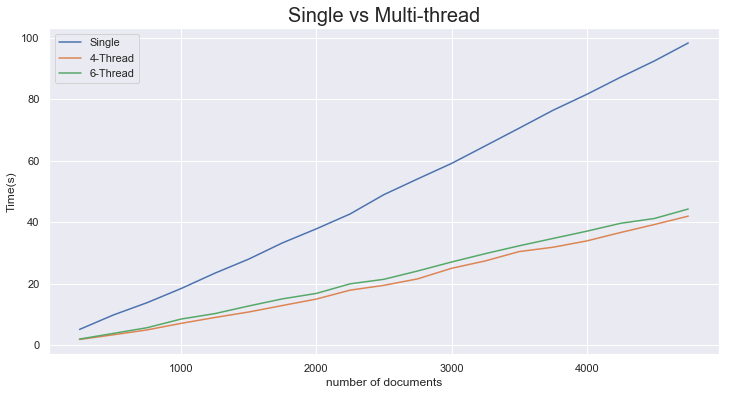

In [9]:
from IPython.display import Image

Image('images/tokenizing_multi-thread.png')